## Homework 11 - Data Competition
### Predicting Customer Acceptance of Coupons

#### Instruction: 
The objective of this data competition is for students to apply various predictive modeling techniques to accurately predict whether a customer will accept coupons for local businesses recommended by an in-vehicle recommender system. Students work in a pair of two students to finish the data competition. If you want to find a partner, you can submit a post on our discussion board. Students are also allowed to finish the work individually. Please work as early as possible so that you have sufficient time to refine your final model by the due time.
Student pairs should work individually to finish the data competition. Any form of collaboration or help from other pairs/persons/parties is NOT allowed. Please submit your work by the due time.

#### Data:
This original data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then asks the subject whether he will accept the coupon if he is the driver. The original data contains the following columns:
•	destination: No Urgent Place, Home, Work

•	passenger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)

•	weather: Sunny, Rainy, Snowy

•	temperature:55, 80, 30

•	time: 2PM, 10AM, 6PM, 7AM, 10PM

•	coupon: Restaurant (< \$20), Coffee House, Carry out and Take away, Bar,
Restaurant (\$20 - \$50)

•	expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)

•	gender: Female, Male

•	age: 21, 46, 26, 31, 41, 50plus, 36, below21

•	maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed

•	has_Children:1, 0

•	education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School

•	occupation: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry

•	income: \$37500 - \$49999, \$62500 - \$74999, \$12500 - \$24999, \$75000 - \$87499, \$50000 - \$62499, \$25000 - \$37499, \$100000 or More, \$87500 - \$99999, Less than \$12500

•	Bar: never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?)

•	CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)

•	CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)

•	RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

•	Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)

•	toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)

•	toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)

•	direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

•	direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

•	accept:1, 0 (whether the coupon is accepted)
In the current dataset, all categorical variables have been converted into dummies. The “train_data.csv” contains 3426 observations that are used to train classification models. The “test_data.csv” contains a dataset of 8456 observations that are used to evaluate the performance of classification models. The test dataset has the same data structure as the training dataset.


In [41]:
# Import data from sklearn
import pandas as pd
import pickle
# Convert data to pandas data frame
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Columns: 110 entries, destination_Home to accept
dtypes: int64(110)
memory usage: 3.0 MB


In [9]:
# Summary statistics
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
destination_Home,3623.0,0.252829,0.434694,0.0,0.0,0.0,1.0,1.0
destination_No Urgent Place,3623.0,0.496274,0.500055,0.0,0.0,0.0,1.0,1.0
destination_Work,3623.0,0.250897,0.433589,0.0,0.0,0.0,1.0,1.0
passenger_Alone,3623.0,0.584322,0.492906,0.0,0.0,1.0,1.0,1.0
passenger_Friend(s),3623.0,0.254485,0.435632,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
toCoupon_GEQ15min,3623.0,0.555893,0.496935,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,3623.0,0.117582,0.322157,0.0,0.0,0.0,0.0,1.0
direction_same,3623.0,0.211151,0.408182,0.0,0.0,0.0,0.0,1.0
direction_opp,3623.0,0.788849,0.408182,0.0,1.0,1.0,1.0,1.0


In [31]:
# Split data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_train.drop('accept', axis=1),
                                                    df_train['accept'],
                                                    test_size=0.2,
                                                    random_state=113)
train_X.shape

(2898, 109)

In [32]:
# Normalize data
from sklearn import preprocessing
train_scale = preprocessing.MinMaxScaler().fit(train_X)
train_X_scale = pd.DataFrame(train_scale.transform(train_X),columns=train_X.columns)
train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
destination_Home,2898.0,0.251553,0.433980,0.0,0.0,0.0,1.0,1.0
destination_No Urgent Place,2898.0,0.496894,0.500077,0.0,0.0,0.0,1.0,1.0
destination_Work,2898.0,0.251553,0.433980,0.0,0.0,0.0,1.0,1.0
passenger_Alone,2898.0,0.585576,0.492707,0.0,0.0,1.0,1.0,1.0
passenger_Friend(s),2898.0,0.252588,0.434572,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
toCoupon_GEQ5min,2898.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
toCoupon_GEQ15min,2898.0,0.557626,0.496754,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,2898.0,0.119393,0.324306,0.0,0.0,0.0,0.0,1.0
direction_same,2898.0,0.210490,0.407727,0.0,0.0,0.0,0.0,1.0


In [33]:
test_X_scale = pd.DataFrame(train_scale.transform(test_X),columns=train_X.columns)
test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
destination_Home,725.0,0.257931,0.437798,0.0,0.0,0.0,1.0,1.0
destination_No Urgent Place,725.0,0.493793,0.500307,0.0,0.0,0.0,1.0,1.0
destination_Work,725.0,0.248276,0.432311,0.0,0.0,0.0,0.0,1.0
passenger_Alone,725.0,0.579310,0.494011,0.0,0.0,1.0,1.0,1.0
passenger_Friend(s),725.0,0.262069,0.440064,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
toCoupon_GEQ5min,725.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
toCoupon_GEQ15min,725.0,0.548966,0.497940,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,725.0,0.110345,0.313535,0.0,0.0,0.0,0.0,1.0
direction_same,725.0,0.213793,0.410265,0.0,0.0,0.0,0.0,1.0


Note that we don't need to normalize outcome y.

## 2. Deep Learning Model

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [35]:
# Specify a deep learning model
model = models.Sequential()
# Add the first dense layer
model.add(layers.Dense(units=64,
                       activation='relu',
                       input_shape=(train_X.shape[1],)))
# Add the second dense layer
model.add(layers.Dense(units=16,
                       activation='relu'))
# Add the second dense layer
model.add(layers.Dense(units=1))

model.compile(loss='mse', 
              optimizer='rmsprop',
              metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7040      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,097
Trainable params: 8,097
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Train deep learning model
history = model.fit(train_X_scale,
                    train_y,
                    epochs=250,
                    verbose=False,
                    validation_data=(test_X_scale,
                                     test_y),
                    batch_size=1)

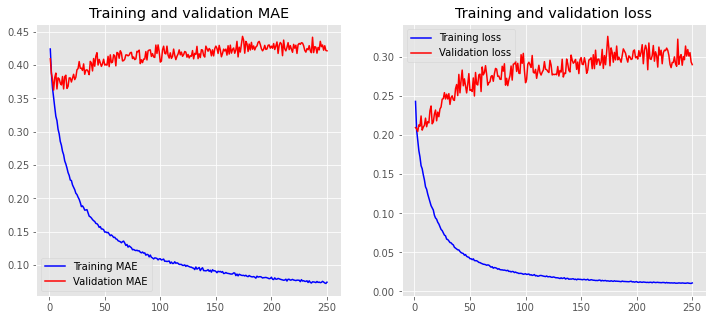

In [37]:
import matplotlib.pyplot as plt
# Enable inline plotting in notebook
%matplotlib inline

plt.style.use('ggplot')

def plot_history(history):
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(mae) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, mae, 'b', label='Training MAE')
    plt.plot(x, val_mae, 'r', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

Calculate performance on test data using the original scale.

In [38]:
pred_y = model.predict(test_X_scale)

# Calculate performance metrics
import numpy as np
from sklearn import metrics
print("Test MAE:",
      round(metrics.mean_absolute_error(test_y, pred_y),3))
print("Test RMSE:",
      round(np.sqrt(metrics.mean_squared_error(test_y, pred_y)),3))
print("Test R Squared:",
      round(metrics.r2_score(test_y, pred_y),3))

23/23 [==============================] - 1s 7ms/step
Test MAE: 0.421
Test RMSE: 0.539
Test R Squared: -0.18


We can also plot the predicted price against the observed price in test data. From the following scatter plot, we can see that the predicted price is highly related to the actual price in the test dataset.

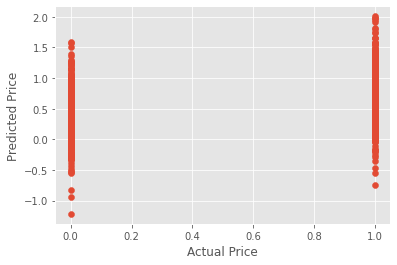

In [39]:
plt.scatter(test_y, pred_y)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [42]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

#clf2.predict(X[0:1])

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-05 23:47:15         1808
metadata.json                                  2022-12-05 23:47:15           64
variables.h5                                   2022-12-05 23:47:15        87664
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-05 23

## Now use model on TEST CSV

In [52]:
x2 = df_test.drop('accept', axis=1)
y2 = np.array(df_test['accept'])

In [53]:
test_x2_scale = pd.DataFrame(train_scale.transform(x2),columns=x2.columns)

In [54]:
y2_predict = clf2.predict(test_x2_scale)

265/265 [==============================] - 1s 2ms/step


In [55]:
# Calculate performance metrics

print("Test MAE:",
      round(metrics.mean_absolute_error(y2, y2_predict),3))
print("Test RMSE:",
      round(np.sqrt(metrics.mean_squared_error(y2, y2_predict)),3))
print("Test R Squared:",
      round(metrics.r2_score(y2, y2_predict),3))

Test MAE: 0.43
Test RMSE: 0.556
Test R Squared: -0.26


## Obtain AUC score

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
#We use the analog- Receiver Operator Curve
metrics.roc_auc_score(_y2, y2_predict)

0.7127564110900227